In [4]:
import quimb as qu
import quimb.tensor as qtn
from itertools import chain, product
import numpy as np
from importlib import reload
import qubitTN as beeky
from autoray import reshape

In [29]:
reload(beeky)

vtn = beeky.MyQubitTN(Lx=3, Ly=3, chi=8)
vtn.compute_hop_expecs()
# norm = vtn.make_norm_tensor()

(4+2j)

(1+0j)


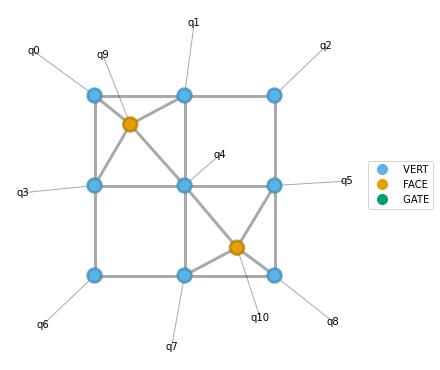

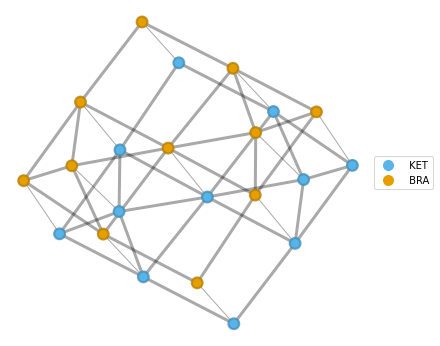

In [11]:
vtn.graph_psi()
print(norm^all)
norm.graph(color=['KET','BRA'])

In [27]:
# X,Y,Z = (qu.pauli(mu) for mu in ['x','y','z'])
# bra = vtn._psi.H
# G = 0.5*sum(X&X, Y&Y)
# G_ket = vtn.apply_gate(vtn._psi, G, where=(0,1))
vtn.compute_hop_expecs()

TypeError: unsupported operand type(s) for +=: 'int' and 'TensorNetwork'